In [ ]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [15]:
# read the dataset using pandas
#data = pd.read_csv('Car details v3 - Copy.csv')
df = pd.read_csv('Car details v3.csv')

In [16]:
df = df.drop_duplicates()

In [17]:
df.shape

(6926, 13)

In [18]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [19]:
df = remove_outlier(df,'year')
df = remove_outlier(df,'selling_price')
df = remove_outlier(df,'km_driven')

In [20]:
df.shape

(6327, 13)

In [21]:
df = df.dropna()

In [22]:
df.shape

(6151, 13)

In [23]:
Correct_Mileage= []
for i in df.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))

In [24]:
df['mileage']=Correct_Mileage
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.00,1248 CC,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.10,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.00,1497 CC,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.00,1298 CC,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.10,1197 CC,81.86,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,24.22,1061 CC,57.5,"7.8@ 4,500(kgm@ rpm)",5.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.50,1364 CC,67.1,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399 CC,68.1,160Nm@ 2000rpm,5.0
10,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.00,1461 CC,108.45,248Nm@ 2250rpm,5.0


In [25]:
df[['engine', 'unit']] = df["engine"].apply(lambda x: pd.Series(str(x).split(" ")))
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248,74,190Nm@ 2000rpm,5.0,CC
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498,103.52,250Nm@ 1500-2500rpm,5.0,CC
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0,CC
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,CC
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,CC


In [26]:
df = df.drop(['unit'], axis=1)

In [27]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6151 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6151 non-null   object 
 1   year           6151 non-null   int64  
 2   selling_price  6151 non-null   int64  
 3   km_driven      6151 non-null   int64  
 4   fuel           6151 non-null   object 
 5   seller_type    6151 non-null   object 
 6   transmission   6151 non-null   object 
 7   owner          6151 non-null   object 
 8   mileage        6151 non-null   float64
 9   engine         6151 non-null   object 
 10  max_power      6151 non-null   object 
 11  torque         6151 non-null   object 
 12  seats          6151 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 672.8+ KB


In [29]:
df['engine']= pd.to_numeric(df['engine'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6151 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6151 non-null   object 
 1   year           6151 non-null   int64  
 2   selling_price  6151 non-null   int64  
 3   km_driven      6151 non-null   int64  
 4   fuel           6151 non-null   object 
 5   seller_type    6151 non-null   object 
 6   transmission   6151 non-null   object 
 7   owner          6151 non-null   object 
 8   mileage        6151 non-null   float64
 9   engine         6151 non-null   int64  
 10  max_power      6151 non-null   object 
 11  torque         6151 non-null   object 
 12  seats          6151 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 672.8+ KB


In [30]:
#df = df.drop(['unit'], axis=1)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [31]:
df['max_power']= pd.to_numeric(df['max_power'],errors = 'coerce')

#df.info()

In [32]:
encoder = ce.OrdinalEncoder(cols=['seller_type', 'transmission', 'owner' , 'fuel' ])

In [33]:
df = encoder.fit_transform(df)


In [34]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.0,1248,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.1,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.0,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.0,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.0,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [35]:
df = df.drop(['torque'], axis=1)


In [36]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.0,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.1,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.0,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.0,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.0,1298,88.20,5.0


In [37]:
df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,6151.000000,6.151000e+03,6151.000000,6151.000000,6151.000000,6151.000000,6151.000000,6151.00000,6151.000000,6151.000000,6151.000000
mean,2013.713217,4.469232e+05,69353.072346,1.498618,1.096895,1.060803,1.494716,19.68914,1378.175093,83.916899,5.387579
std,3.591728,2.486127e+05,39379.465176,0.556665,0.309799,0.238988,0.725335,4.19739,442.842529,25.304233,0.935133
min,2003.000000,3.150400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,38908.500000,1.000000,1.000000,1.000000,1.000000,17.00000,1196.000000,67.100000,5.000000
50%,2014.000000,4.000000e+05,68000.000000,1.000000,1.000000,1.000000,1.000000,19.70000,1248.000000,81.800000,5.000000
75%,2017.000000,6.000000e+05,100000.000000,2.000000,1.000000,1.000000,2.000000,22.50000,1497.000000,97.700000,5.000000
max,2020.000000,1.227000e+06,189000.000000,4.000000,3.000000,2.000000,4.000000,46.81600,3498.000000,272.000000,14.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6151 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6151 non-null   object 
 1   year           6151 non-null   int64  
 2   selling_price  6151 non-null   int64  
 3   km_driven      6151 non-null   int64  
 4   fuel           6151 non-null   int32  
 5   seller_type    6151 non-null   int32  
 6   transmission   6151 non-null   int32  
 7   owner          6151 non-null   int32  
 8   mileage        6151 non-null   float64
 9   engine         6151 non-null   int64  
 10  max_power      6151 non-null   float64
 11  seats          6151 non-null   float64
dtypes: float64(3), int32(4), int64(4), object(1)
memory usage: 528.6+ KB


In [39]:
df['name'].value_counts()

Maruti Swift Dzire VDI                               118
Maruti Alto 800 LXI                                   76
Maruti Alto LXi                                       69
Maruti Swift VDI                                      59
Maruti Alto K10 VXI                                   47
                                                    ... 
Mahindra KUV 100 mFALCON G80 K4                        1
Maruti A-Star Zxi                                      1
Tata Indigo CS GLS BSIII                               1
Tata Indica Vista Aura Safire Anniversary Edition      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV           1
Name: name, Length: 1773, dtype: int64

In [40]:
maisons = []
modeles = []
for idx, name in zip(range(len(df['name'])) ,df['name']):
    maisons.append(name.split(" ")[0])
    modeles.append(name.split(" ")[1])
df['maison'] = maisons
df['modeles'] = modeles

In [41]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,maison,modeles
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.0,1248,74.00,5.0,Maruti,Swift
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.1,1498,103.52,5.0,Skoda,Rapid
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.0,1497,78.00,5.0,Honda,City
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.0,1396,90.00,5.0,Hyundai,i20
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.0,1298,88.20,5.0,Maruti,Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,2,1,1,2,18.0,998,67.10,5.0,Maruti,Wagon
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,1,1,1,2,22.5,1396,88.73,5.0,Hyundai,i20
8123,Hyundai i20 Magna,2013,320000,110000,2,1,1,1,18.0,1197,82.85,5.0,Hyundai,i20
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,4,16.0,1493,110.00,5.0,Hyundai,Verna


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6151 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6151 non-null   object 
 1   year           6151 non-null   int64  
 2   selling_price  6151 non-null   int64  
 3   km_driven      6151 non-null   int64  
 4   fuel           6151 non-null   int32  
 5   seller_type    6151 non-null   int32  
 6   transmission   6151 non-null   int32  
 7   owner          6151 non-null   int32  
 8   mileage        6151 non-null   float64
 9   engine         6151 non-null   int64  
 10  max_power      6151 non-null   float64
 11  seats          6151 non-null   float64
 12  maison         6151 non-null   object 
 13  modeles        6151 non-null   object 
dtypes: float64(3), int32(4), int64(4), object(3)
memory usage: 624.7+ KB


In [43]:
df = df.drop(['name'], axis=1)

In [44]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,maison,modeles
0,2014,450000,145500,1,1,1,1,23.0,1248,74.00,5.0,Maruti,Swift
1,2014,370000,120000,1,1,1,2,21.1,1498,103.52,5.0,Skoda,Rapid
2,2006,158000,140000,2,1,1,3,17.0,1497,78.00,5.0,Honda,City
3,2010,225000,127000,1,1,1,1,23.0,1396,90.00,5.0,Hyundai,i20
4,2007,130000,120000,2,1,1,1,16.0,1298,88.20,5.0,Maruti,Swift


In [45]:
encoder = ce.OrdinalEncoder(cols=['maison', 'modeles'])
df = encoder.fit_transform(df)


In [46]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,maison,modeles
0,2014,450000,145500,1,1,1,1,23.0,1248,74.00,5.0,1,1
1,2014,370000,120000,1,1,1,2,21.1,1498,103.52,5.0,2,2
2,2006,158000,140000,2,1,1,3,17.0,1497,78.00,5.0,3,3
3,2010,225000,127000,1,1,1,1,23.0,1396,90.00,5.0,4,4
4,2007,130000,120000,2,1,1,1,16.0,1298,88.20,5.0,1,1


In [47]:

df['modeles'].value_counts()

1      611
18     389
4      300
6      239
72     173
      ... 
77       1
134      1
144      1
135      1
157      1
Name: modeles, Length: 157, dtype: int64

In [48]:
df['maison'].value_counts()

1     2007
4     1188
8      643
9      594
3      348
6      340
10     206
7      201
5      188
13     167
14      72
2       60
11      57
17      38
15      14
18      10
12       5
19       4
21       4
22       2
16       1
20       1
23       1
Name: maison, dtype: int64

In [49]:
X = df.drop(['selling_price'], axis=1)

y = df['selling_price']


In [50]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
#Actual Value 
print(y_test)
#Prediced Value
print(y_pred)


3475     500000
8104     160000
6845     325000
6249     310000
6497    1000000
         ...   
442      600000
2841     875000
1172     300000
7249     450000
54       525000
Name: selling_price, Length: 1231, dtype: int64
[619016.10274698 194813.71954361 441832.18804459 ... 389817.78479759
 520052.82000259 656398.81932864]


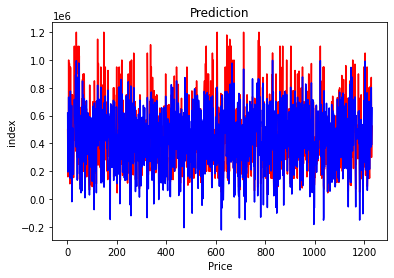

In [52]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Price')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

In [53]:
from sklearn.metrics import r2_score,mean_squared_error

In [54]:
mse = mean_squared_error(y_test,y_pred)

In [55]:
rsq = r2_score(y_test,y_pred)

In [56]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 14951534453.082357
r square : 0.7539601893014628


In [57]:
from sklearn.tree import DecisionTreeRegressor
 
 

In [58]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [69]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
regressor.fit(X_train,Y_train)


DecisionTreeRegressor(max_depth=3, min_samples_split=3)

In [68]:
Y_pred = regressor.predict(X_test) 
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, Y_pred))
rsq = r2_score(y_test,y_pred)
print(rsq)

0.7539601893014628
